In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [ ]:
titanic=pd.read_csv(url,',') #reading the csv file

In [133]:
titanic.head(10) #showing the first ten instances

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:

X=pd.DataFrame([titanic.Pclass,titanic.Sex,titanic.Age,titanic.Fare,titanic.Embarked,titanic.Survived]).T

In [135]:
X #transposing the matrix

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22,7.25,S,0
1,1,female,38,71.2833,C,1
2,3,female,26,7.925,S,1
3,1,female,35,53.1,S,1
4,3,male,35,8.05,S,0
5,3,male,NaN,8.4583,Q,0
6,1,male,54,51.8625,S,0
7,3,male,2,21.075,S,0
8,3,female,27,11.1333,S,1
9,2,female,14,30.0708,C,1


In [136]:
#Survivors
titanic.Survived.sum() #in total 342 people survived

342

In [ ]:
X['Child']=pd.cut(X['Age'],bins=[-1,12,3333],
                  labels=['Child','Others'])
child_dictionary={
    'Child':1,
    'Others':0
}
X.Child=X.Child.map(child_dictionary) # adding the child column and assigning corresponding values via dictionary

In [138]:
children=X[X.Child==1]
len(children[children.Survived==1]) #taking the lenght to get the number of children that survived 

92

In [ ]:
embarked_dictionary={
    'S':0,
    'C':1,
    'Q':2
}
X.Embarked=X.Embarked.map(embarked_dictionary) #assigning int values to different places at which people embarked

In [ ]:
sex_dictionary={
    'male':0,
    'female':1
}
X.Sex=X.Sex.map(sex_dictionary) #assigning int values for different genders 

In [ ]:
X['Age'] = X.Age.fillna(X.Age.value_counts().index[0])
X['Child'] = X.Child.fillna(X.Child.value_counts().index[0])
X['Embarked'] = X.Embarked.fillna(X.Embarked.value_counts().index[0])

#filling the nan values in each column that we need

In [142]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Child
0,3,0,22.0,7.25,0.0,0,0.0
1,1,1,38.0,71.2833,1.0,1,0.0
2,3,1,26.0,7.925,0.0,1,0.0
3,1,1,35.0,53.1,0.0,1,0.0
4,3,0,35.0,8.05,0.0,0,0.0


Text(0.5, 1.0, 'Age vs Sex ')

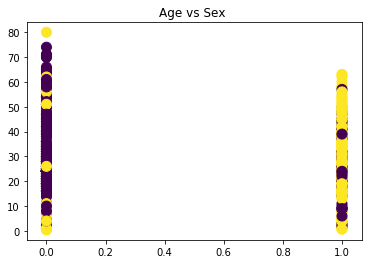

In [143]:

plt.scatter(X.Sex,X.Age,c=X.Survived,s=100)  # scatter plotting age vs sex graph
plt.title('Age vs Sex ')

In [ ]:
Pclass=pd.DataFrame([X.Pclass,X.Sex]).T #creating the class dataframe and transposing it

In [ ]:
Pclass1=Pclass[Pclass.Pclass==1]
Pclass2=Pclass[Pclass.Pclass==2]
Pclass3=Pclass[Pclass.Pclass==3]

In [146]:
Pclass1.Sex.value_counts()

0    122
1     94
Name: Sex, dtype: int64

In [147]:
Pclass2.Sex.value_counts()

0    108
1     76
Name: Sex, dtype: int64

In [148]:
Pclass3.Sex.value_counts()

0    347
1    144
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Third Class')

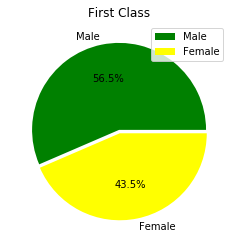

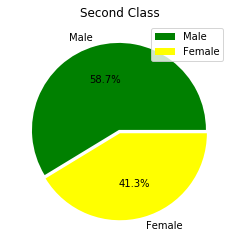

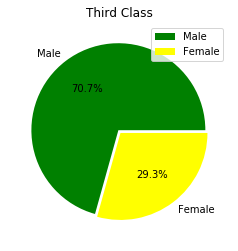

In [149]:
colors=['green','yellow']
explode=[.02,.02]
plt.pie(Pclass1.Sex.value_counts(),colors=colors,explode=explode,labels=['Male','Female'],autopct='%.1f%%')
plt.legend()
plt.title('First Class')
plt.figure()
plt.pie(Pclass2.Sex.value_counts(),colors=colors,explode=explode,labels=['Male','Female'],autopct='%.1f%%')
plt.legend()
plt.title('Second Class')
plt.figure()
plt.pie(Pclass3.Sex.value_counts(),colors=colors,explode=explode,labels=['Male','Female'],autopct='%.1f%%')
plt.legend()
plt.title('Third Class') # plotting the class vs sex

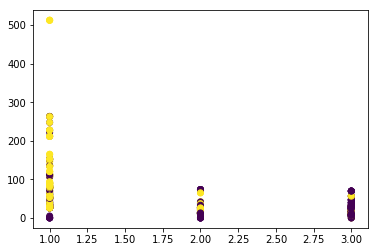

In [150]:
plt.scatter(X.Pclass,X.Fare,c=X.Survived) # plotting the fare vs class

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
y = titanic.Survived.values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [154]:
X_train.shape

(712, 7)

In [ ]:
X.Survived=X['Survived'].astype(int)

In [ ]:

KNN=KNeighborsClassifier(n_neighbors=3)

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
KNN=KNN.fit(X_train,y_train)

In [159]:
y_predict=KNN.predict(X_test)
sum(y_predict==y_test)/len(y_test)* 100 #calculating the accuracy

77.09497206703911